# K Nearest Neighbours (KNN) – Home Exercise

This is a home excerise for AI-hub internship candidates. Please submit a Jupyter notebook link. Please do not use any AI (e.g. chatGPT) to solve this.

## A few useful links:
•	Some short data science courses, including intro to Python and Machine learning, can be found on [Kaggle](https://www.kaggle.com/learn)

•	Link to HPC [wiki](https://hpcwiki.weizmann.ac.il/en/home/ai_hub)

•	Link to our WEXAC [Jupyter hub](https://access.wexac.weizmann.ac.il:8000/hub/login) (you'll need a WEXAC user)


## Intoduction
Short intro to machine learning can be found [here](https://www.youtube.com/watch?v=ukzFI9rgwfU)

K Nearest Neighbours: 
KNN is a simple supervised machine learning (ML) algorithm that can be used for classification or regression tasks, and is also frequently used in missing value imputation. It is based on the idea that the closer an observation is to a set of other observations - it is most likely of a "similar" nature. We can therefore classify unforeseen points based on the values of the closest existing points. By choosing K, the user can select the number of nearby observations to use in the algorithm. 
For classification, a majority vote is often used to determine under which class a new observation should fall into: find the K nearest neighbours, and check out of
these K neighbours which label is the most common - and classify the new observation with this label.
In this exercise you will implement a K-nearest neighbours algorithm on the famous built-in Iris dataset in Python. We will do this in few small steps. 

Please write all your answer as functions and not scripts.

## Tutorial

#### 1. Read the built-in dataset and split it to train and test subsets:

a. Write your imports in the first box (add here all the tutorial imports)

b. Write a function that will open the dataset and split it to training and testing with the default parameters: random_state=42  (42="the meaning of life, the universe, and everything"...) and test_size=20 (20 samples), and run it (there are other intersting parameters like stratify, please do not change the defults). Print the shape of the four output matrices.

c. What are the features and targets in the dataset? 

d. Load as dataFrame and print the statistical desription of the data.

Hints:

A. Use the sklearn function which provides an object that has properties `data` and `target` returning the data and the labels respectively, and `feature_names` and `target_names` returning their descriptions (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) for more details)

B. To split the the data between training and testing, use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) - and check its parameters.

In [1]:
#Imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import DistanceMetric
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# Question 1b 
data_load = load_iris()

data = data_load.data
target = data_load.target

feature_names = data_load.feature_names
target_names = data_load.target_names

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

print('The shape of the training data is:', X_train.shape)
print('The shape of the training labels is:', y_train.shape)
print('The shape of the test data is:', X_test.shape)
print('The shape of the test labels is:', y_test.shape)

The shape of the training data is: (120, 4)
The shape of the training labels is: (120,)
The shape of the test data is: (30, 4)
The shape of the test labels is: (30,)


In [3]:
# Question 1c
print('The features in the dataset are:\n', feature_names)
print('\n')
print('The target names are:\n', target_names)

The features in the dataset are:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The target names are:
 ['setosa' 'versicolor' 'virginica']


In [4]:
# Question 1d
df_iris = pd.DataFrame(data, columns=feature_names)
df_iris['target'] = target 
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### 2. Distance function: 

Write a function `calc_distance` that calculates the distance between a given point and an array of points. Different distance measures might be used, pick one that is simple. Test it on this input. A simple test that is easy to check by a calculator (or by hand) is alway recommended in your code. 

`calc_distance(X_train[0,:], X_train[:4,:])`

Hint: find a function that does it (e.g. in sklearn) or write it yourself. Check that the point shape is correct.

In [5]:
# Question 2 
# def euclidean_distance(x, y):
#     return np.sqrt(np.sum((x - y) ** 2))
from sklearn.metrics import pairwise_distances

def calc_distance(x, y):
    x = np.array(x).reshape(1, -1)
    return pairwise_distances(x, y, metric='euclidean')

#test the function:
x = X_train[0,:]
y = X_train[:4,:]

print('The Euclidean distance between x and y is:', calc_distance(x, y))

The Euclidean distance between x and y is: [[0.         1.46287388 4.20238028 0.66332496]]


#### 3. K Nearest neighbours: 

Write a function that accepts an input value x0 and searches the training dataset for the k nearest neighbours to x0 using the function you've written, then predicts the input's label according to a majority vote. Test your function for the first row of *the test set* with k=7:

knn(k,X_test[0,:] )

Hint: 
You can calculate all the distances and then sort the distances in ascending order. Then, choose the k first elements. With these k nearest neighbours, do the "voting", i.e. find the most common label amongst them. 


In [32]:
# Question 3
def knn(k,x0, dataset, labels):
    #calculating distance between x0 and all points in the dataset
    distances = calc_distance(x0, dataset)
    distances = np.array(distances)
    #sorting the distances and getting the indices
    indices = np.argsort(distances).flatten()
    #getting the labels of the k nearest and returning the most common label
    label = np.bincount(labels[indices[:k]]).argmax()
    return label

#test the function:
k = 7
x0 = X_test[0,:]

print('The predicted label is:', knn(k, x0, X_train, y_train))

The predicted label is: 1


#### 4. Accuracy:

a. Calculate the accuracy (as a percentage) of the above prediction using the test dataset. Run it for k=7.

Hint: 
Calculate the prediction given to every element of the test data and compare it to the expected labels from the test. Calculate the fraction of correctly predicted items to the overall number of items.

b. Think about the time for training and for testing. Is this method efficient for large dataset with many samples and features? Why?


In [36]:
# Quesion 4 
def calc_accuracy(k, dataset, labels):
    y_pred = []
    #for every point in the dataset, predict the label using knn and append it to y_pred
    for i in range (dataset.shape[0]):
        y_pred.append(knn(k, dataset[i,:],dataset, labels))
    y_pred = np.array(y_pred)
    #calculate the accuracy
    accuracy = np.mean(y_pred == labels) * 100
    return accuracy

#test the function:
k = 7
dataset = X_test
labels = y_test

print('The percentage of correct predictions is:', f'{calc_accuracy(k, dataset, labels):.2f}%')

The percentage of correct predictions is: 96.67%


##### Answer 4: 


The prediction of the KNN algorithm involves calculating the distances between all the data points and all other data points
in the dataset which can computationally intensive when performing on large datasets. 

#### 5. Dependence on k:

Write a function that calculates the accuracy as a function of k and plots accuracy vs. k.

Hint: use `plot` function in `matplotlib.pyplot`.


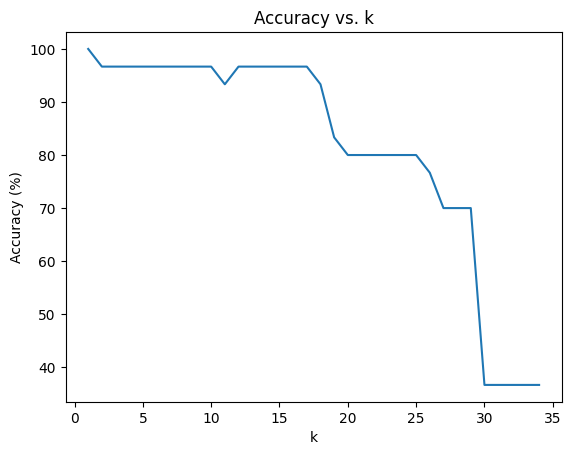

In [ ]:
# Question 5

def plot_accuracy(k_value):
    #initialize the k_values range
    k_values = np.arange(1, k_value, 1)
    accuracy_values = []
    #calculate the accuracy for every k in the range
    for k in k_values:
        accuracy = calc_accuracy(k, X_test, y_test)
        accuracy_values.append(accuracy)

    #plot the accuracy as a function of k
    plt.plot(k_values, accuracy_values)
    plt.xlabel('k')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy vs. k')
    plt.show()

#test the function:
plot_accuracy(35)   

## 6.  Main function: 

a. Write a main function that contains loading the data and calculating the accuracy as a function of k (k=1,2,..15). 

b. Run it 20 times to check for variations (with random_state=None) with one plot of mean and STD as an output. 

c. What do you learn from it? Which values of k are better?

Hint: Can you see a differnce between odd and even values of k?

In [ ]:
# Question 6a
def main_function(k_value):
    #Loading the data sets:
    data_load = load_iris()
    #Split data:
    X_train, X_test, y_train, y_test = train_test_split(data_load.data, data_load.target, test_size=0.2, random_state=None)
    
    accuracies = []
    #calculate the accuracy for every k in the range
    for k in np.arange(1, k_value+1, 1):
        accuracy = calc_accuracy(k, X_test, y_test)
        accuracies.append(accuracy)
    return accuracies

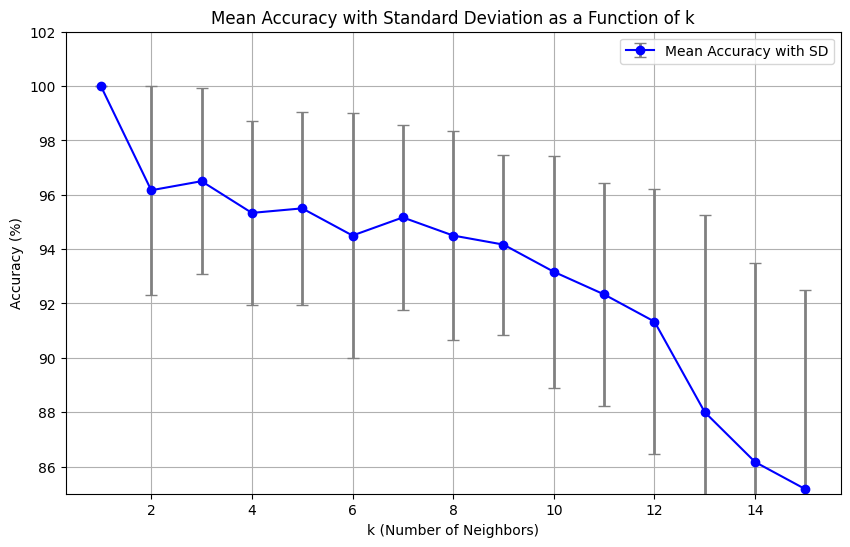

In [ ]:
# Question 6b
mat = np.zeros((20, 15))

for i in range(20):
    #run the main function 20 times and store the results in a matrix
    accuracies = main_function(15)
    mat[i,:] = accuracies

#calculate the mean and standard deviation of the accuracies
mean_accuracies = mat.mean(axis=0) 
std_accuracies = mat.std(axis=0)   
k_values = np.arange(1, 16)

#plot the mean accuracy with standard deviation as a function of k
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, mean_accuracies, yerr=std_accuracies, fmt='-o', color='b', 
             ecolor='gray', elinewidth=2, capsize=4, label='Mean Accuracy with SD')

plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('Mean Accuracy with Standard Deviation as a Function of k')
plt.legend()
plt.ylim(85,102)
plt.grid()
plt.show()



##### Answer 6c: 


A Slightly higher Accuracy is visible for odd numbers during the first 8 k values. Its possible that when there is an even k value, some results has equal number of votes for 2 different labels, leading to ambiguity.

#### 7. Scikit-learn KNN classifier:

a. Use sklearn’s [KNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to write the function calc_accuracy_sklearn that Calculate the accuracy (as a percentage) on the test data. Run it for k=7 and compare the result with question 4. 

b. What are the advantages of using the sklearn module for such a simple classifier?

In [45]:
# Question 7a
def calc_accuracy_sklearn(k, dataset, labels):
    #initialize the knn model from sklearn
    knn_sk = KNeighborsClassifier(n_neighbors=k)
    #fit the model with test data as in question 4
    knn_sk.fit(dataset, labels)
    #calculate the accuracy
    accuracy = knn_sk.score(dataset, labels) * 100
    
    return accuracy

n_neighbors = 7
dataset = X_test
labels = y_test

print('The accuracy of my knn model is:', f'{calc_accuracy(7, dataset, labels):.2f}%')
print('The accuracy of sklearn knn model is:', f'{calc_accuracy_sklearn(7, dataset, labels):.2f}%')


The accuracy of my knn model is: 96.67%
The accuracy of sklearn knn model is: 96.67%


##### Answer 7b:


The main advantge i see is the simplicity of writing just a few lines of code to get a similar result 

#### 8. Scatter plot:

a. Plot the dataset as a scatter plot for features 0 and 2 setting the colors of the points in the plot based on their label, and write the feature names on the axis.

b. What can you learn from this plot?

c. Bonus (optional): plot the boundary display for features 0 and 2 using [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html)

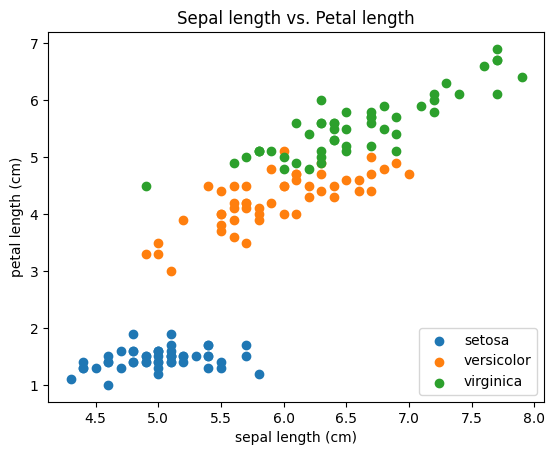

In [46]:
# Assuming data is your dataset, target is the target array, and target_names has three class labels

for i, target_name in enumerate(target_names):
    plt.scatter(data[target == i, 0], data[target == i, 2], label=target_name)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[2])
plt.title('Sepal length vs. Petal length')
plt.legend(loc='lower right')
plt.show()


##### Answer 8b



The  variability inside the groups is mostly from sepal length, while variability between the groups mainly comes from petal length. Petal length seems like a better measure to classify the samples.

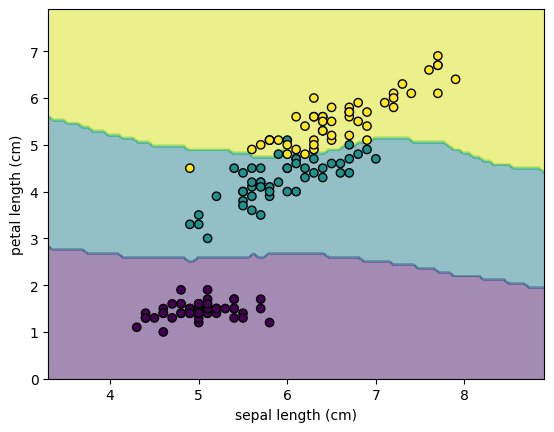

In [48]:
X= data[:, [0, 2]]
y = target

clf = KNeighborsClassifier(n_neighbors=k).fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="predict",
    xlabel=feature_names[0], ylabel=feature_names[2],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=target, edgecolor="k")

plt.show()